Conjunto de datos ficticio creado por los científicos de datos de IBM. Donde contiene variables categoricas y numericas sobre distintas personas, como su edad, sueldo, distancia al trabajo, sastifacion laboral, desgaste, genero, educacion, rendimiento, porcentaje de salario, etc.

El siguiente dataset esta compuesto por 1470 filas y 35 columnas:


1.   Edad de la persona
1.   Desgaste laboral
1.   Viaje de negocios
1.   Tasa diaria
1.   Departamento
2.   Distancia desde la casa
2.   Educación
2.  Campo de educación
2.   Conteo de empleados
1.   Empleado número
1.   Satisfacción en el medio laboral
1.   Género
1.   Tarifa por hora
2.   Participación del trabajo
2.   Nivel de trabajo
2.   Rol en el trabajo
2.   Satisfacción laboral
2.   Estado civil
2.   Ingresos mensuales
1.   Tarifa mensual
1.   Numero de compañias trabajado
1.   Más de 18
1.   Tiempo extra
2.   Porcentaje de salario
2.   Rendimiento
2.   Satisfacción de la relación
2.   Horas estándar
2.   Nivel de opción de acciones
2.   Total de años trabajando
1.   Tiempos de entrenamiento el año pasado
1.   Balance de la vida laboral
1.   Años en la empresa
1.   Años en el rol actual
2.   Años desde la última promoción
2.   Años con Curr Manager
  
Posibles preguntas a responder con el analisis:

¿Cuál es la relación entre la edad de los empleados y el desgaste laboral?\
¿Existe alguna correlación entre la distancia al trabajo y la satisfacción laboral de los empleados?\
¿Hay alguna interacción significativa entre las variables que podría influir en la deserción laboral?\
¿Cuáles son las características más importantes que influyen en la deserción laboral según un modelo predictivo?

In [1]:
# importo librerias a usar
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.metrics import (accuracy_score, log_loss, classification_report)
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, make_scorer, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

In [2]:
# Importo el data frame y lo nombro df

df=pd.read_csv('/content/drive/MyDrive/Trabajo final dataset /WA_Fn-UseC_-HR-Employee-Attrition.csv',sep=',')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
# veo el dataset
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [4]:
# chequeo que no haya nulos
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [5]:
# veo el numero de personas con desgaste

conteo_desgaste = df['Attrition'].value_counts()
conteo_desgaste

Attrition
No     1233
Yes     237
Name: count, dtype: int64

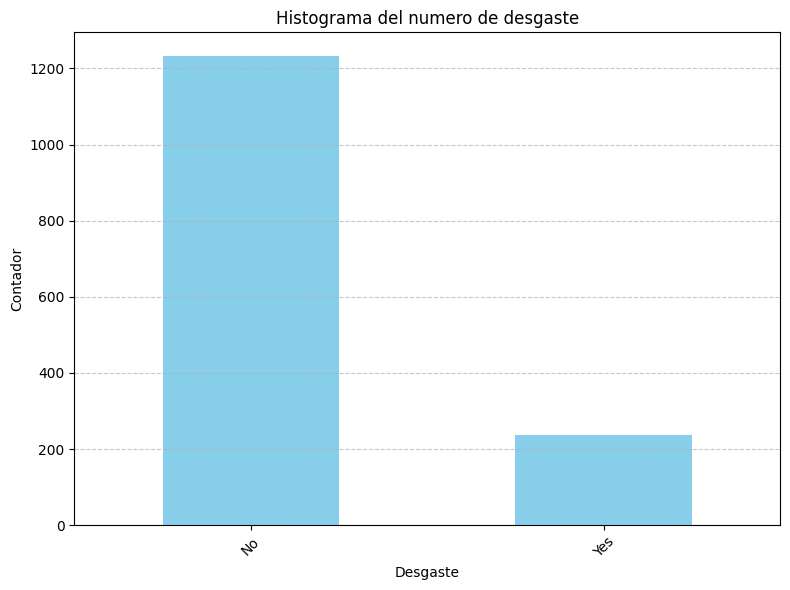

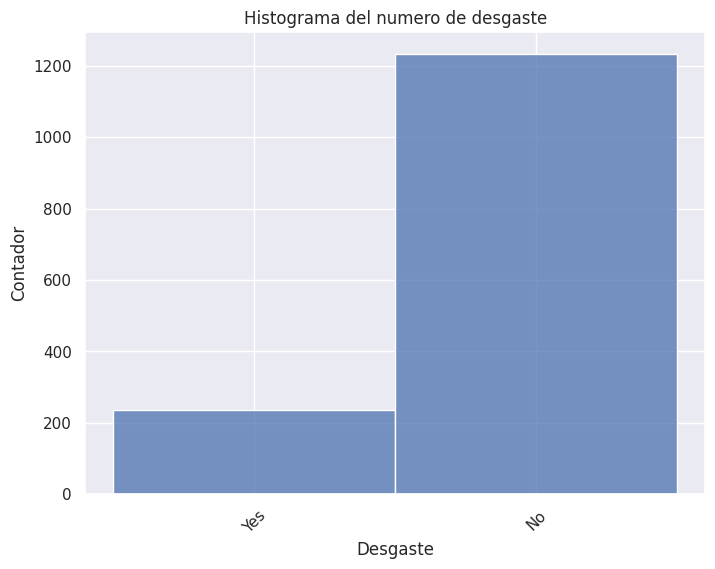

In [6]:
# veo el cantidad de personas con desgaste por medio de diferentes grafico

#con matplotlip
plt.figure(figsize=(8, 6))
conteo_desgaste.plot(kind='bar', color='skyblue')
plt.title('Histograma del numero de desgaste')
plt.xlabel('Desgaste')
plt.ylabel('Contador')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#con seaborn
plt.figure(figsize=(8, 6))
sns.set_theme()
sns.histplot( data= df, x='Attrition')
plt.title('Histograma del numero de desgaste')
plt.xlabel('Desgaste')
plt.ylabel('Contador')
plt.xticks(rotation=45)
plt.show()

Se puede observas que hay un menor numero de personas con desgaste laboral que personas con no desgaste, veo cualitativamente algunas posibles razones por la cual hay personas con desgaste laboral para esto realizo grafico de diferentes distribuciones.

In [7]:
# creo un df nuevo separando por los casos de attrition YES y NO

attrition_yes = df[df['Attrition'] == 'Yes']
attrition_no = df[df['Attrition'] == 'No']


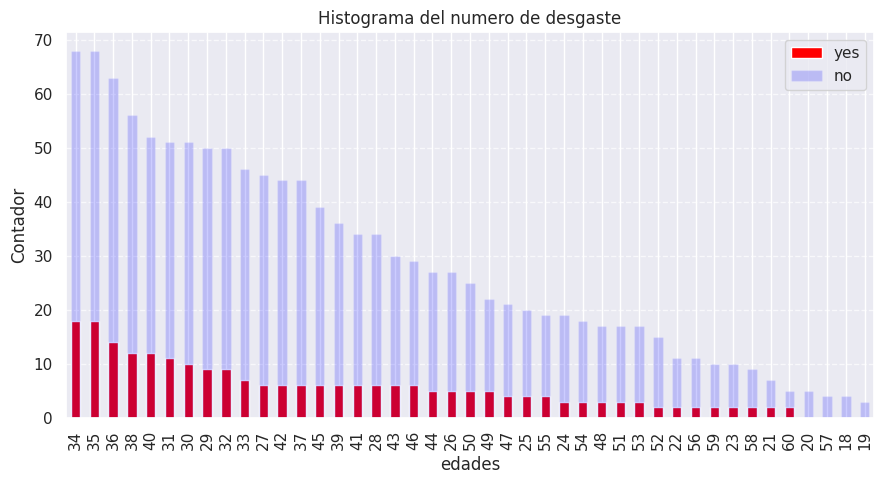

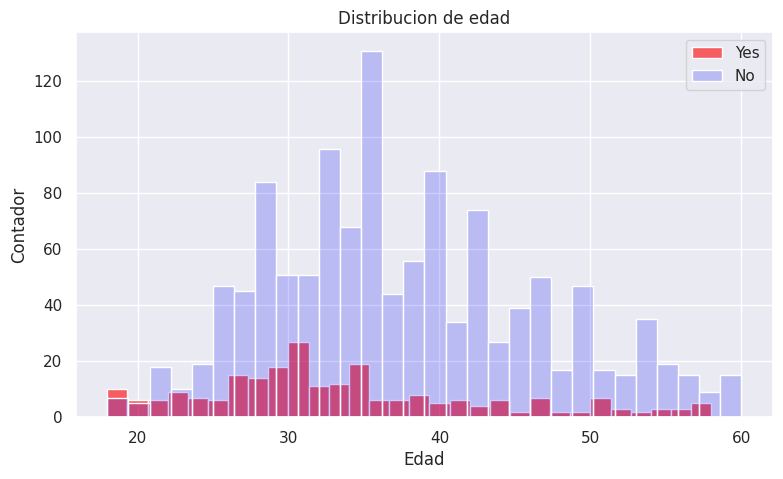

In [8]:
# veo la distribucion de edades

#con matplotlip
plt.figure(figsize=(9, 5))
attrition_yes['Age'].value_counts().plot(kind='bar', color='red',label='yes')
attrition_no['Age'].value_counts().plot(kind='bar',color='blue',label='no', alpha=0.2)
plt.title('Histograma del numero de desgaste')
plt.xlabel('edades')
plt.ylabel('Contador')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(9, 5))
sns.histplot(data=attrition_yes, x=attrition_yes['Age'],  bins=30, label='Yes', color='red', alpha=0.6)
sns.histplot(data=attrition_no, x=attrition_no['Age'], bins=30, label='No', color='blue', alpha=0.2)
plt.xlabel('Edad')
plt.ylabel('Contador')
plt.title('Distribucion de edad')
plt.legend()
plt.show()


**Se puede observar que entre los 25 y 35 años se encuentra una mayor densidad de personas con desgaste laboral**

In [9]:
# Función para clasificar las edades
def clasificar_edad(edad):
    if 25 <= edad <= 35:
        return '25-35'
    else:
        return 'No 25-35'

# Aplica la función a la columna 'edad' y crea una nueva columna 'clasificacion_edad'
attrition_yes['clasificacion_edad'] = attrition_yes['Age'].apply(lambda x: clasificar_edad(x))


<ipython-input-9-fc05857e67b6>:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



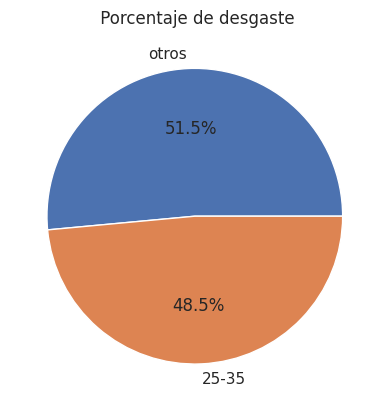

In [10]:
# veo dicho porcentaje en un grafico de torta

attrition_counts = attrition_yes['clasificacion_edad'].value_counts()
labels = ['otros', '25-35']
plt.pie(attrition_counts, labels=labels, autopct='%1.1f%%')
plt.title(' Porcentaje de desgaste')
plt.show()

**Alrrededor de un 48% de las personas con desgastes tienen una edad entre los 25 y 35 años**

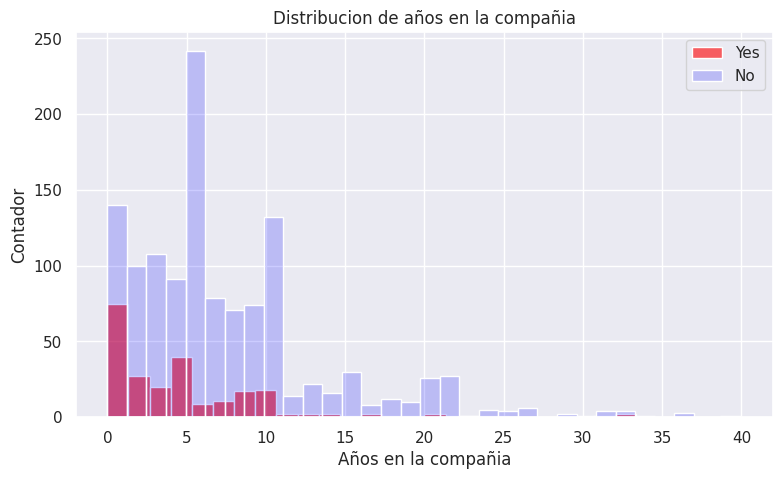

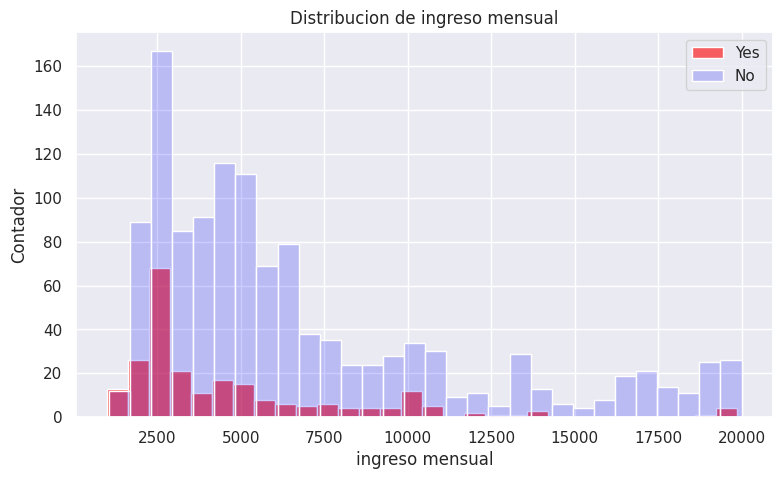

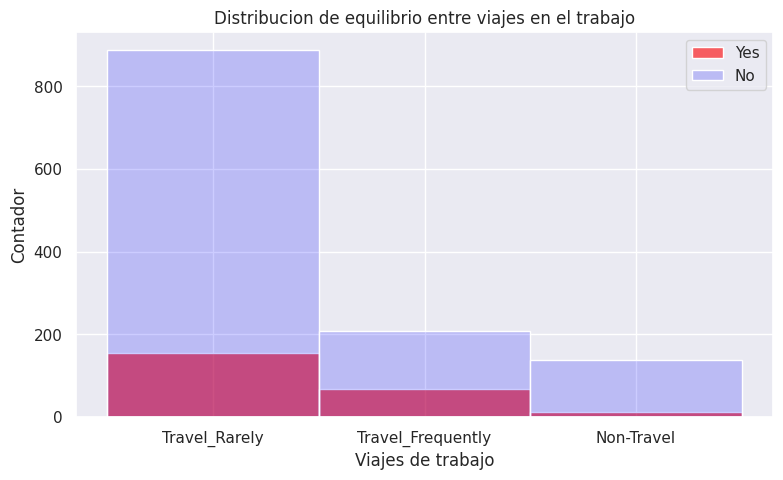

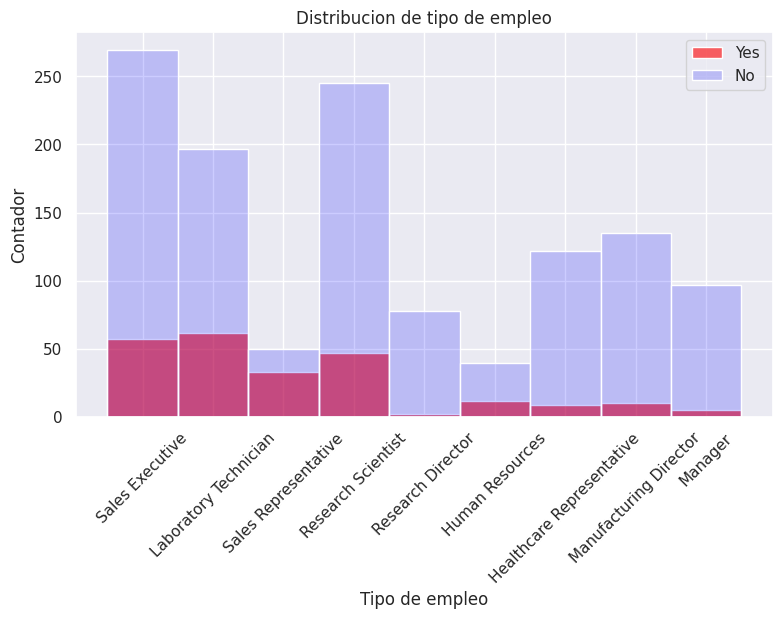

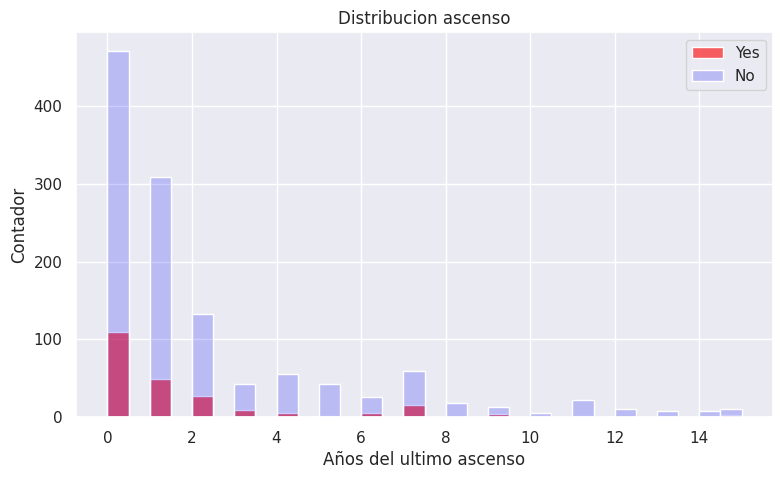

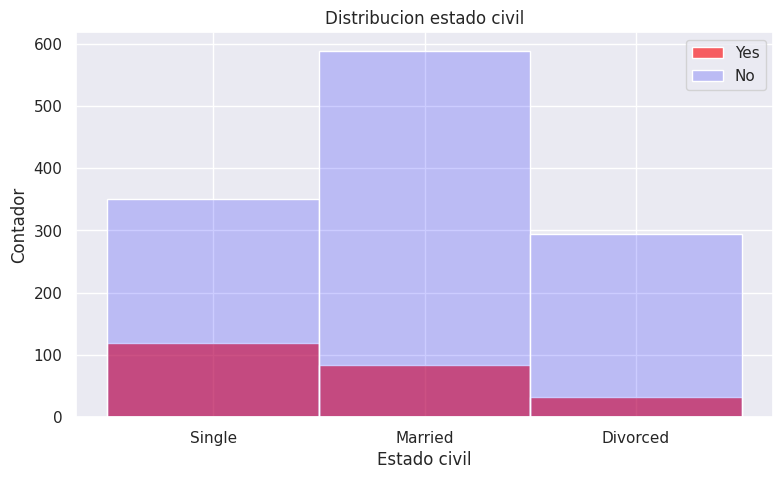

In [11]:
# veo otras distribuciones


# distribucion de tipo de año en la compañia
plt.figure(figsize=(9, 5))
sns.histplot(data=attrition_yes, x=attrition_yes['YearsAtCompany'],  bins=30, label='Yes', color='red', alpha=0.6)
sns.histplot(data=attrition_no, x=attrition_no['YearsAtCompany'], bins=30, label='No', color='blue', alpha=0.2)
plt.xlabel('Años en la compañia')
plt.ylabel('Contador')
plt.title('Distribucion de años en la compañia')
plt.legend()
plt.show()

# distribucion de tipo de ingreso mensual
plt.figure(figsize=(9, 5))
sns.histplot(data=attrition_yes, x=attrition_yes['MonthlyIncome'],  bins=30, label='Yes', color='red', alpha=0.6)
sns.histplot(data=attrition_no, x=attrition_no['MonthlyIncome'], bins=30, label='No', color='blue', alpha=0.2)
plt.xlabel('ingreso mensual')
plt.ylabel('Contador')
plt.title('Distribucion de ingreso mensual')
plt.legend()
plt.show()

# distribucion de viajes por trabajp
plt.figure(figsize=(9, 5))
sns.histplot(data=attrition_yes, x=attrition_yes['BusinessTravel'],  bins=30, label='Yes', color='red', alpha=0.6)
sns.histplot(data=attrition_no, x=attrition_no['BusinessTravel'], bins=30, label='No', color='blue', alpha=0.2)
plt.xlabel('Viajes de trabajo')
plt.ylabel('Contador')
plt.title('Distribucion de equilibrio entre viajes en el trabajo')
plt.legend()
plt.show()



# distribucion de tipo de empleo
plt.figure(figsize=(9, 5))
sns.histplot(data=attrition_yes, x=attrition_yes['JobRole'],  bins=30, label='Yes', color='red', alpha=0.6)
sns.histplot(data=attrition_no, x=attrition_no['JobRole'], bins=30, label='No', color='blue', alpha=0.2)
plt.xticks(rotation=45)
plt.xlabel('Tipo de empleo')
plt.ylabel('Contador')
plt.title('Distribucion de tipo de empleo')
plt.legend()
plt.show()

# distribucion de ultimo ascenso
plt.figure(figsize=(9, 5))
sns.histplot(data=attrition_yes, x=attrition_yes['YearsSinceLastPromotion'],  bins=30, label='Yes', color='red', alpha=0.6)
sns.histplot(data=attrition_no, x=attrition_no['YearsSinceLastPromotion'], bins=30, label='No', color='blue', alpha=0.2)
plt.xlabel('Años del ultimo ascenso')
plt.ylabel('Contador')
plt.title('Distribucion ascenso')
plt.legend()
plt.show()

# distribucion de estado civil
plt.figure(figsize=(9, 5))
sns.histplot(data=attrition_yes, x=attrition_yes['MaritalStatus'],  bins=30, label='Yes', color='red', alpha=0.6)
sns.histplot(data=attrition_no, x=attrition_no['MaritalStatus'], bins=30, label='No', color='blue', alpha=0.2)
plt.xlabel('Estado civil')
plt.ylabel('Contador')
plt.title('Distribucion estado civil')
plt.legend()
plt.show()

**De las distribuciones obtenidas se puede obsevar que:**



1.   **Mayor tiempo en la compañia contribuye a una menor insidencia en la deserción**
2.   **A mayor ingreso mensual, mayor estabilidad economica, por ende menor tendencia a la deserción**
1.   **Los viajes frecuentes pueden interrumpir el equilibrio entre el trabajo y la vida, posiblemente contribuyendo a la deserción.**
2.   **el trabajo de horas extras puede conducir al agotamiento y disminuir la satisfacción laboral, lo que puede contribuir a la deserción.**
1. **la falta de avance profesional puede conducir a la insatisfacción de los empleados y contribuir a la deserción.**  
2.  **la falta de compromiso familiar u otros lazos financieros podría tener influencia de empleados individuales para buscar otras oportunidades profesionales en otros lugares.**







In [12]:
# remuevo columnas irrelevantes

df = df.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'], axis=1)
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


In [13]:
categorical_cols = df.select_dtypes(include=[object]).columns.tolist()
categorical_cols

['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'OverTime']

In [14]:
# creo un nuevo df con varibles solamentes numericas
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

df_categoric_1=df.copy()
df_categoric_1['Attrition']= label_encoder.fit_transform(df_categoric_1['Attrition']).astype(int)
df_categoric_1[ 'BusinessTravel']= label_encoder.fit_transform(df_categoric_1[ 'BusinessTravel']).astype(int)
df_categoric_1['Department']= label_encoder.fit_transform(df_categoric_1['Department']).astype(int)
df_categoric_1['EducationField']= label_encoder.fit_transform(df_categoric_1['EducationField']).astype(int)
df_categoric_1['Gender']= label_encoder.fit_transform(df_categoric_1['Gender']).astype(int)
df_categoric_1[ 'JobRole']= label_encoder.fit_transform(df_categoric_1[ 'JobRole']).astype(int)
df_categoric_1['MaritalStatus']= label_encoder.fit_transform(df_categoric_1['MaritalStatus']).astype(int)
df_categoric_1['OverTime']= label_encoder.fit_transform(df_categoric_1['OverTime']).astype(int)

df_categoric_1.head(2)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,2,0,...,3,1,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,3,1,...,4,4,1,10,3,3,10,7,1,7


Reduzco la dimensionalidad

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X = df_categoric_1.drop('Attrition', axis=1)  # Defino las características (X) excluyendo la variable objetivo
y = df_categoric_1['Attrition']               # Defino la variable objetivo (y)



# Dividimos los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [17]:
y_test

1041    0
184     0
1222    1
67      0
220     0
       ..
567     0
560     0
945     0
522     0
651     0
Name: Attrition, Length: 294, dtype: int64

In [18]:
feature_names = X.columns.tolist()
feature_names

['Age',
 'BusinessTravel',
 'DailyRate',
 'Department',
 'DistanceFromHome',
 'Education',
 'EducationField',
 'EnvironmentSatisfaction',
 'Gender',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobRole',
 'JobSatisfaction',
 'MaritalStatus',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'OverTime',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [19]:
# Inicializamos una lista para almacenar las características seleccionadas
selected_features_fs = []

In [20]:
# Implementación de Forward Selection

# Mejor error inicialmente infinito
best_error = float('inf')

In [21]:
# Mientras queden características por seleccionar
while len(selected_features_fs) < len(X.columns) - 1:  # Menos uno porque excluimos la variable objetivo
    best_feature = None
        # Iterar sobre las características no seleccionadas
    for feature in X.columns:
        if feature not in selected_features_fs:
            # Añadir la característica al conjunto seleccionado
            candidate_features_fs = selected_features_fs + [feature]
            # Creamos un modelo de regresión lineal con las características candidatas
            model = LinearRegression()
            model.fit(X_train[candidate_features_fs], y_train)
            y_pred = model.predict(X_test[candidate_features_fs])
            error = mean_squared_error(y_test, y_pred)
            # Si el error es mejor que el mejor error encontrado hasta ahora, actualizamos
            if error < best_error:
                best_error = error
                best_feature = feature
    # Añadimos la mejor característica al conjunto seleccionado
    if best_feature is not None:
      # Añadimos la mejor característica al conjunto seleccionado
      selected_features_fs.append(best_feature)
      print("Feature added:", best_feature, "with error:", best_error)
    else:
      # Si no se encontró ninguna característica nueva que mejore el modelo, salimos del bucle
      break

print('El método forward selection seleccionó ', len(selected_features_fs), 'features o columnas')
print("Los features seleccionados son:", selected_features_fs)

Feature added: Age with error: 0.11229697046535501
Feature added: JobInvolvement with error: 0.10879343328062181
Feature added: EnvironmentSatisfaction with error: 0.10557206301049005
Feature added: YearsWithCurrManager with error: 0.10399825452187367
Feature added: DistanceFromHome with error: 0.10250392061359952
Feature added: JobSatisfaction with error: 0.10121366404737703
Feature added: YearsSinceLastPromotion with error: 0.10041238005503884
Feature added: DailyRate with error: 0.09971150710179418
Feature added: TrainingTimesLastYear with error: 0.09914110414561124
Feature added: RelationshipSatisfaction with error: 0.09866078783062127
Feature added: MonthlyIncome with error: 0.09841194428515737
Feature added: WorkLifeBalance with error: 0.09830147931362894
Feature added: HourlyRate with error: 0.09822217894937812
Feature added: EducationField with error: 0.09816174101784608
Feature added: MonthlyRate with error: 0.09813114666513796
Feature added: BusinessTravel with error: 0.09810

In [22]:
selected_features_fs

['Age',
 'JobInvolvement',
 'EnvironmentSatisfaction',
 'YearsWithCurrManager',
 'DistanceFromHome',
 'JobSatisfaction',
 'YearsSinceLastPromotion',
 'DailyRate',
 'TrainingTimesLastYear',
 'RelationshipSatisfaction',
 'MonthlyIncome',
 'WorkLifeBalance',
 'HourlyRate',
 'EducationField',
 'MonthlyRate',
 'BusinessTravel',
 'Gender']

In [23]:
# Creo un df con las features seleccionadas del forward selection y la variable target
df_categoric_selected_fs =df_categoric_1[['Attrition'] + selected_features_fs]
df_categoric_selected_fs.head()



,Attrition,Age,JobInvolvement,EnvironmentSatisfaction,YearsWithCurrManager,DistanceFromHome,JobSatisfaction,YearsSinceLastPromotion,DailyRate,TrainingTimesLastYear,RelationshipSatisfaction,MonthlyIncome,WorkLifeBalance,HourlyRate,EducationField,MonthlyRate,BusinessTravel,Gender
0,1,41,3,2,5,1,4,0,1102,0,1,5993,1,94,1,19479,2,0
1,0,49,2,3,7,8,2,1,279,3,4,5130,3,61,1,24907,1,1
2,1,37,2,4,0,2,3,0,1373,3,2,2090,3,92,4,2396,2,1
3,0,33,3,4,0,3,3,3,1392,3,3,2909,3,56,1,23159,1,0
4,0,27,3,1,2,2,2,2,591,3,4,3468,3,40,3,16632,2,1


<Axes: >

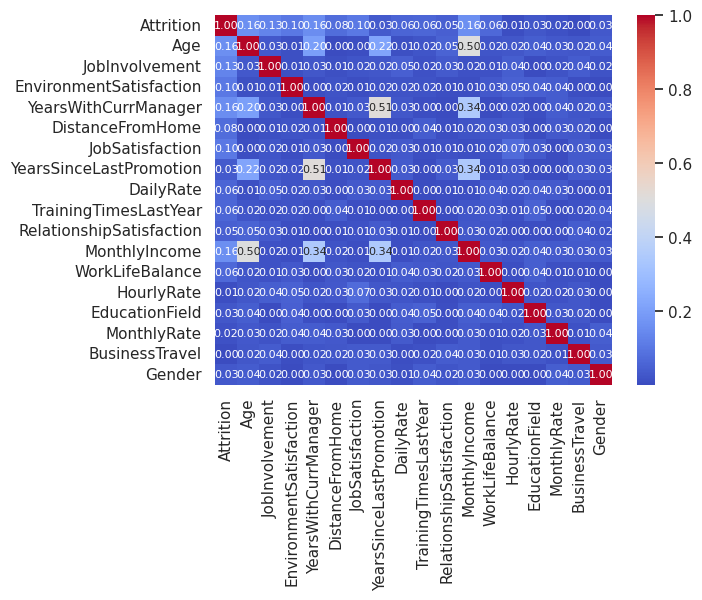

In [24]:
matriz_corr= df_categoric_selected_fs.corr().abs()
sns.heatmap(matriz_corr, annot=True, cmap="coolwarm", fmt=".2f", annot_kws={"size": 8})

In [26]:
# divido en entrenamiento y test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# con smote 'equilibrio' el peso de cada columna
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

**Algoritmo de regresion**

In [27]:
# aplico algoritmo de regresion

logistic_model = LogisticRegression(solver='liblinear')
logistic_model.fit(X_train_resampled, y_train_resampled)

y_pred = logistic_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

ypp = logistic_model.predict_proba(X_test)[:, 1]


Accuracy: 0.8095238095238095
Confusion Matrix:
 [[215  40]
 [ 16  23]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.84      0.88       255
           1       0.37      0.59      0.45        39

    accuracy                           0.81       294
   macro avg       0.65      0.72      0.67       294
weighted avg       0.86      0.81      0.83       294



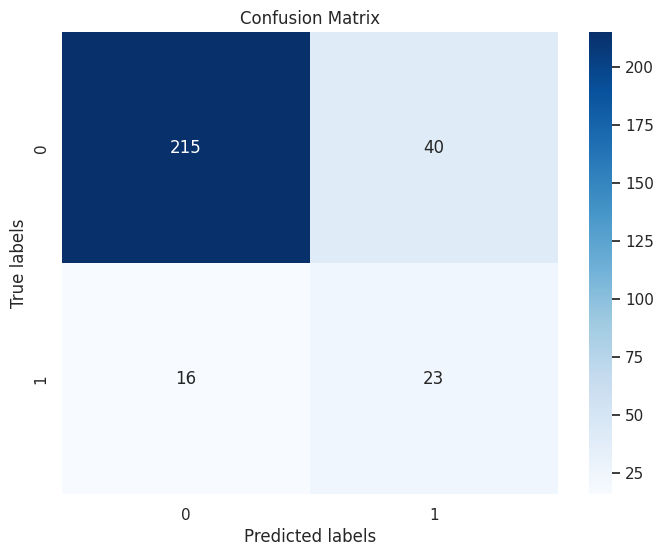

In [28]:
# visualizo la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


  **Random forest classifier**

In [29]:
# creo modelo Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)

# entreno al modelo
rf.fit(X_train_resampled, y_train_resampled)

# defino las predicciones sonbre los datos de pruebas
y_pred = rf.predict(X_test)

# calculo accuracy
accuracy = accuracy_score(y_test, y_pred)

# imprimo el valor de actuary obtenido con el modelo
print('Random Forest Classifier accuracy:', accuracy)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

Random Forest Classifier accuracy: 0.8299319727891157


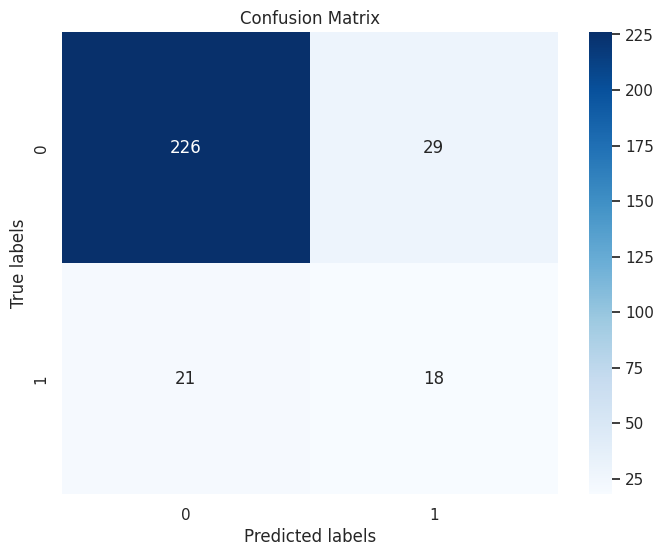

In [30]:
# visualizo la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [31]:
print("Accuracy score: {}".format(accuracy_score(y_test, y_pred)))
print("="*80)
print(classification_report(y_test, y_pred))

Accuracy score: 0.8299319727891157
              precision    recall  f1-score   support

           0       0.91      0.89      0.90       255
           1       0.38      0.46      0.42        39

    accuracy                           0.83       294
   macro avg       0.65      0.67      0.66       294
weighted avg       0.84      0.83      0.84       294



La precisión obtenida del modelo nos dice qué tan bien el modelo puede predecir si un empleado dejará a la empresa (desgaste = 1) o permanecer (desgaste = 0) en función de las características dadas. En este caso, la puntuación de precisión indica que el modelo puede predecir correctamente el resultado de aproximadamente el 85% de las muestras de datos de prueba. Esto puede darnos una idea de qué características son más importantes para determinar si un empleado abandonará la empresa o no, y puede usarse para desarrollar estrategias para retener a los empleados y reducir las tasas de deserción.

**Arbol de decision**

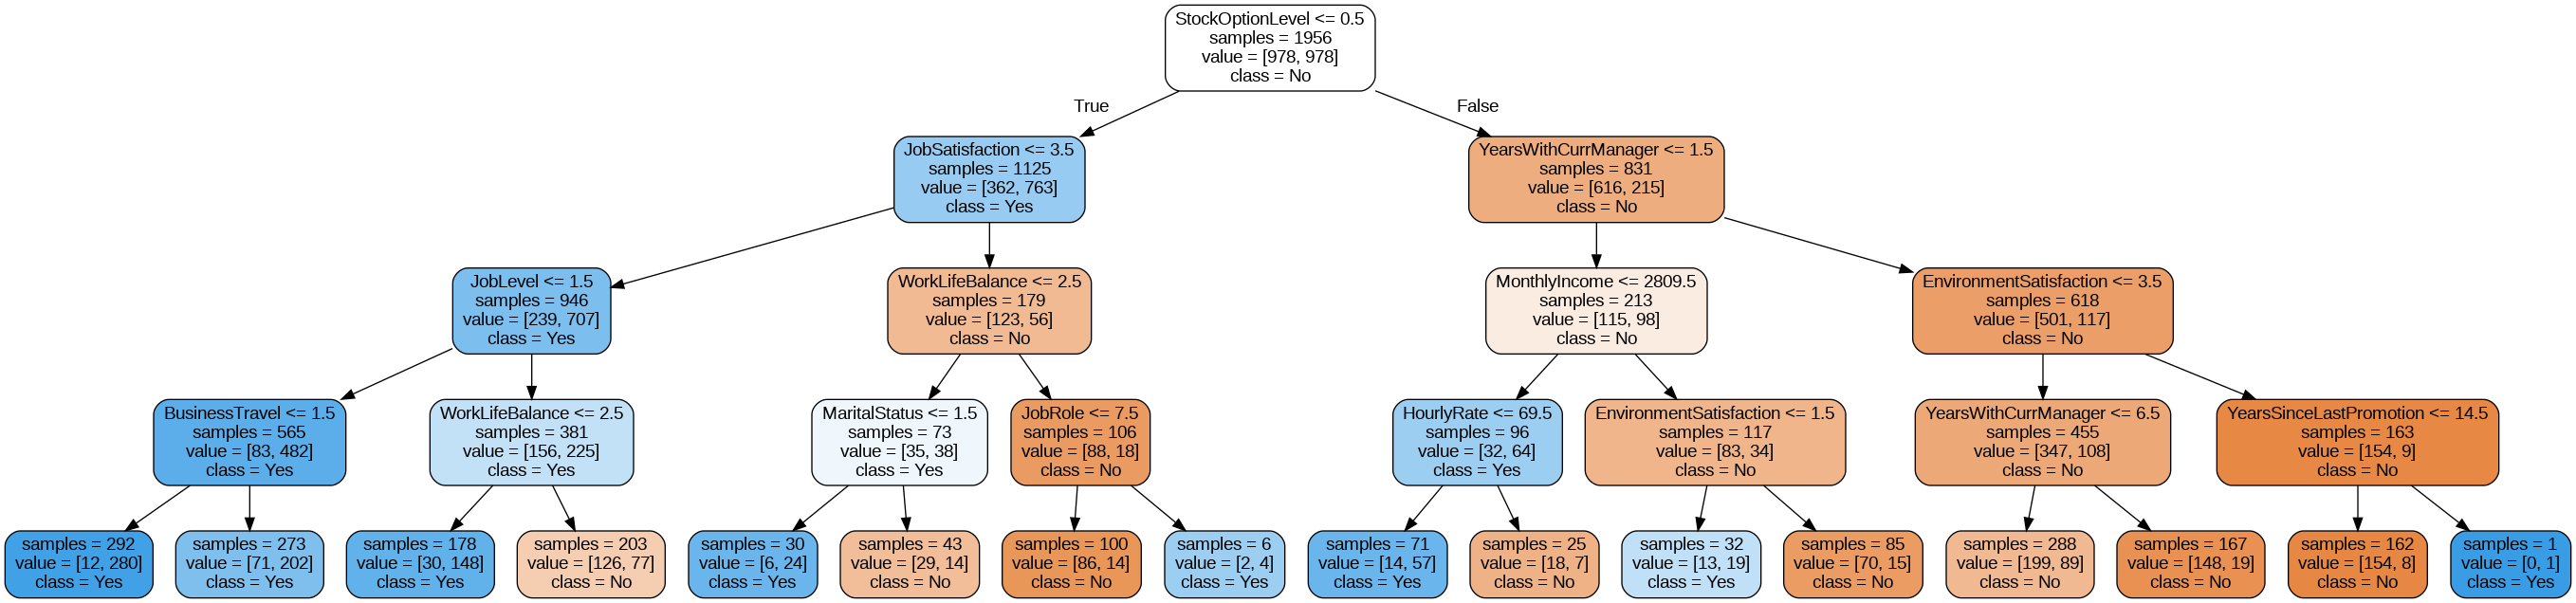

In [32]:
from sklearn import tree
from IPython.display import Image as PImage
from subprocess import check_call
from PIL import Image, ImageDraw, ImageFont
import re

decision_tree = tree.DecisionTreeClassifier(max_depth = 4)
decision_tree.fit(X_train_resampled, y_train_resampled)

# defino las predicciones sonbre los datos de pruebas
y_pred = decision_tree.predict(X_test)

# exporto modelo como archivo .dot
with open("tree1.dot", 'w') as f:
     f = tree.export_graphviz(decision_tree,
                              out_file=f,
                              max_depth = 4,
                              impurity = False,
                              feature_names = X.columns.values,
                              class_names = ['No', 'Yes'],
                              rounded = True,
                              filled= True )

# convierto el archivo .dot en png
check_call(['dot','-Tpng','tree1.dot','-o','tree1.png'])


# grafico
img = Image.open("tree1.png")
draw = ImageDraw.Draw(img)
img.save('sample-out.png')
PImage("sample-out.png", height=500, width=5900)

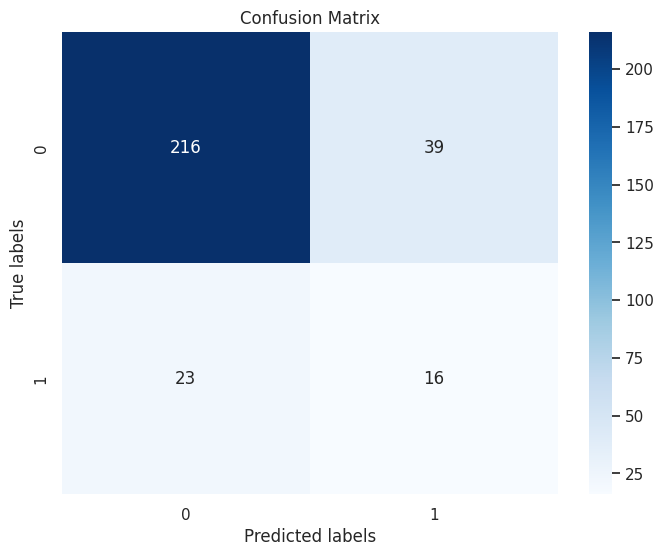

In [33]:
# visualizo la matriz de confusión

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)


plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [34]:
print("Accuracy score: {}".format(accuracy_score(y_test, y_pred)))
print("="*80)
print(classification_report(y_test, y_pred))

Accuracy score: 0.7891156462585034
              precision    recall  f1-score   support

           0       0.90      0.85      0.87       255
           1       0.29      0.41      0.34        39

    accuracy                           0.79       294
   macro avg       0.60      0.63      0.61       294
weighted avg       0.82      0.79      0.80       294



# Conclusiones

 **La precisión obtenida del modelo nos dice qué tan bien se puede predecir si un empleado dejará a la empresa (desgaste = 1) o permanecer (desgaste = 0) en función de las características dadas. Para este analisis se utilizo tres tipos de modelos diferente, Regresion Logistica, Random Forest Classifier y Arbol de clasificacion.**\
**Donde se visualizo la matriz de confusion y se obtuvo el valor de accuary que determina la exactitud del modelo. Obteniendose para Regresion Logistica  un Accuracy score=0.80, para Random Forest Classifier un Accuracy score=0.82 y para Arbol de clasificacion un Accuracy score=0.78**


**Esto indica que el modelo de  Random Forest Classifier tiene una mayor presicion a la hora de predecir correctamente el resultado. Esto puede darnos una idea de qué características son más importantes para determinar si un empleado abandonará la empresa o no, y puede usarse para desarrollar estrategias para retener a los empleados y reducir las tasas de deserción.**